
#DATASET - BÍBLIA

## Considerações Iniciais
<https://augustomen.wordpress.com/2017/03/01/quantos-versiculos-ha-em-cada-capitulo-da-biblia/>

In [ ]:
#Primeiro deve-se criar o Diretório onde está o arquivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#É importante e necessário importar as Bibliotecas que serão utilizadas
import pandas as pd     #É Utilizada para análise exploratoria dos dados permite ler, manipular, agregar e plotar os dados.
import matplotlib.pyplot as plt #Possui recursos para a geração de gráficos 2D a partir de arrays.
import seaborn as sns   #Ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada.
import numpy as np      #É usado principalmente para realizar cálculos em Arrays Multidimensionais.
import re               #É o método findall serve para retornar uma lista ou grupos de ocorrências de um padrão em uma string.

#UTILIZANDO - Pandas
#Importando Base de Dados
path = "/content/drive/MyDrive/Colab Notebooks/DataSetBiblia3.csv"
df = pd.read_csv (path,sep=';') #Separador de colunas ';'

## Análise Inicial

In [ ]:
#Poderia ser usado o .dtypes para relacionar os tipos de dados
#O .shape para calcular o total de colunas e de linhas do arquivo.
#O .columns para relacionar as colunas do arquivo.
#E imprimir com: print(f'O arquivo possui: {df.shape[0]} Linhas e {df.shape[1]} Colunas\n\n{df.columns}')

#RESUMO DE TODAS AS INFORMAÇÕES DO ARQUIVO:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Divisão     1189 non-null   object
 1   Livro       1189 non-null   object
 2   Capítulo    1189 non-null   object
 3   Versículos  1189 non-null   int64 
 4   Palavras    1189 non-null   int64 
 5   Caracteres  1189 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 55.9+ KB
None


Variável Categórica - Divisão, Livro e Capítulo

Variáveis Inteiras - Versículos, Palavras e Caracteres

In [ ]:
separador = '(...)'
#Imprimir as três primeiras linhas e as três últimas linhas
print(f'{df.head(3)}\n\n{separador.center(80)}\n\n {df.tail(3)}')

            Divisão    Livro Capítulo  Versículos  Palavras  Caracteres
0  Velho Testamento  Gênesis      '1'          31       726        3531
1  Velho Testamento  Gênesis      '2'          25       574        2733
2  Velho Testamento  Gênesis      '3'          24       588        2955

                                     (...)                                      

               Divisão       Livro Capítulo  Versículos  Palavras  Caracteres
1186  Novo Testamento  Apocalipse     '20'          15       424        2128
1187  Novo Testamento  Apocalipse     '21'          27       684        3511
1188  Novo Testamento  Apocalipse     '22'          21       501        2621


In [ ]:
#Descrição estatística do arquivo de dados
round(df.describe(),2)

,Versículos,Palavras,Caracteres
count,1189.00,1189.00,1189.00
mean,26.16,594.13,3195.90
std,13.47,297.75,1598.93
min,2.00,29.00,163.00
25%,17.00,383.00,2060.00
50%,24.00,560.00,3015.00
75%,33.00,766.00,4085.00
max,176.00,2304.00,13070.00


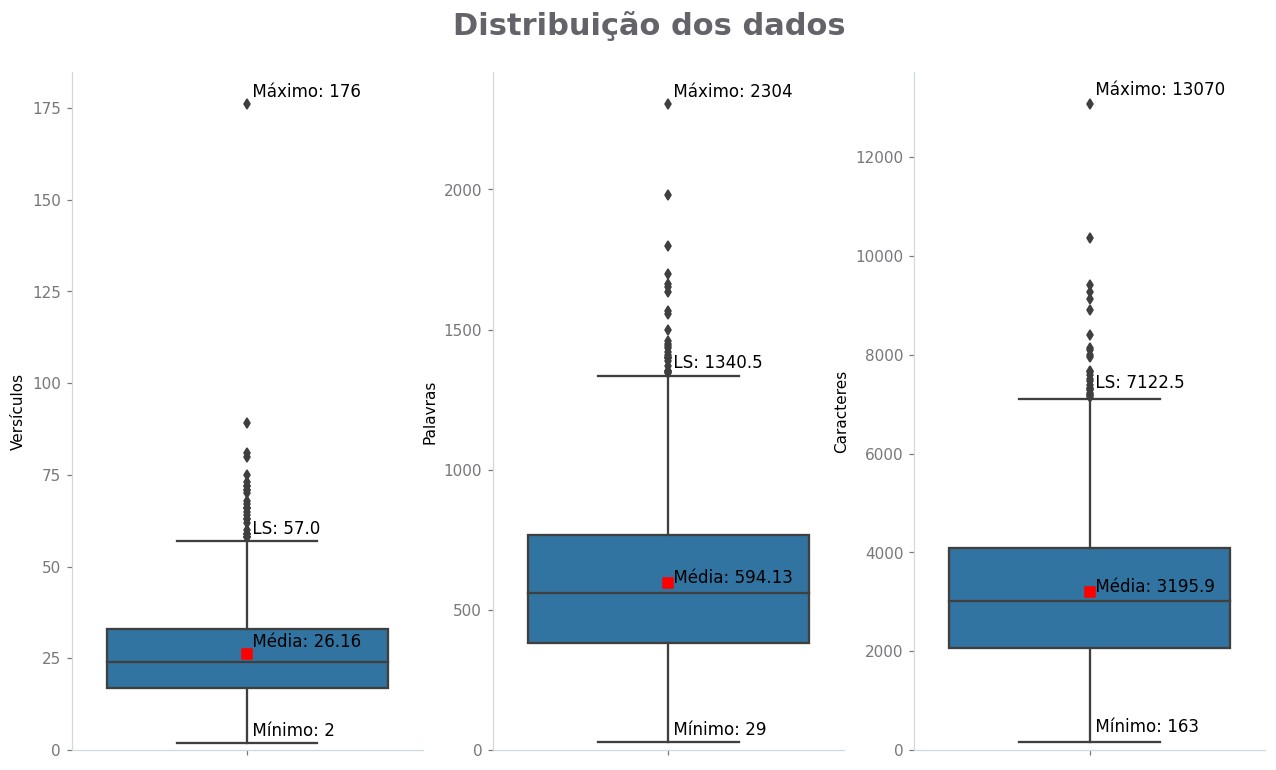

In [ ]:
#*UTILIZANDO - Seaborn e Matplotlib*

# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(14,8),       # (largura, altura) em polegadas
                       dpi=110)                                   # resolução (pontos/polegada)
# Título geral
fig.suptitle('Distribuição dos dados', fontsize=20,y=0.95,weight = 'bold', color = '#646369')

#1° Gráfico
sns.boxplot(y=df['Versículos'], ax = ax[0],showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red",
                       "markeredgecolor":"red",
                      "markersize":"6"})
#------------Pontuando os valores-------------------------
mediaV = round(df['Versículos'].mean(),2)
ax[0].text(0,mediaV+2,' Média: '+str(mediaV),color='black', fontsize=11)
minV=round(df['Versículos'].min(),2)
maxV=round(df['Versículos'].max(),2)
ax[0].text(0,maxV+2,' Máximo: '+str(maxV),color='black', fontsize=11)
ax[0].text(0,minV+2,' Mínimo: '+str(minV),color='black', fontsize=11)
Q3V = np.percentile(df['Versículos'],75)
Q1V = np.percentile(df['Versículos'],25)
LsV=round(Q3V+1.5*(Q3V-Q1V),2)
ax[0].text(0,LsV+2,' LS: '+str(LsV),color='black', fontsize=11)
#-------------------------------------
ax[0].axis(ymin=0)
#Sumir com linhas laterais
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_color('#cfd8dc')
ax[0].spines['left'].set_color('#cfd8dc')
# modifica a aparência dos ticks, ticks labels e gridlines
ax[0].tick_params(axis='both', colors ='#76787B',labelsize=10)

#2° Gráfico
sns.boxplot(y=df['Palavras'],ax = ax[1],showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red",
                       "markeredgecolor":"red",
                      "markersize":"6"})
ax[1].axis(ymin=0)
#Sumir com linhas laterais
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_color('#cfd8dc')
ax[1].spines['left'].set_color('#cfd8dc')
# modifica a aparência dos ticks, ticks labels e gridlines
ax[1].tick_params(axis='both', colors ='#76787B',labelsize=10)

#------------Pontuando os valores-------------------------
mediaP = round(df['Palavras'].mean(),2)
ax[1].text(0,mediaP+2,' Média: '+str(mediaP),color='black', fontsize=11)
minP=round(df['Palavras'].min(),2)
maxP=round(df['Palavras'].max(),2)
ax[1].text(0,maxP+25,' Máximo: '+str(maxP),color='black', fontsize=11)
ax[1].text(0,minP+25,' Mínimo: '+str(minP),color='black', fontsize=11)
Q3P = np.percentile(df['Palavras'],75)
Q1P = np.percentile(df['Palavras'],25)
LsP=round(Q3P+1.5*(Q3P-Q1P),2)
ax[1].text(0,LsP+25,' LS: '+str(LsP),color='black', fontsize=11)
#-------------------------------------


#3° Gráfico
sns.boxplot(y=df['Caracteres'],ax = ax[2],showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red",
                       "markeredgecolor":"red",
                      "markersize":"6"})
ax[2].axis(ymin=0)
#Sumir com linhas laterais
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_color('#cfd8dc')
ax[2].spines['left'].set_color('#cfd8dc')
# modifica a aparência dos ticks, ticks labels e gridlines
ax[2].tick_params(axis='both', colors ='#76787B',labelsize=10)

#------------Pontuando os valores-------------------------
mediaC = round(df['Caracteres'].mean(),2)
ax[2].text(0,mediaC+2,' Média: '+str(mediaC),color='black', fontsize=11)
minC=round(df['Caracteres'].min(),2)
maxC=round(df['Caracteres'].max(),2)
ax[2].text(0,maxC+200,' Máximo: '+str(maxC),color='black', fontsize=11)
ax[2].text(0,minC+200,' Mínimo: '+str(minC),color='black', fontsize=11)
Q3C = np.percentile(df['Caracteres'],75)
Q1C = np.percentile(df['Caracteres'],25)
LsC=round(Q3C+1.5*(Q3C-Q1C),2)
ax[2].text(0,LsC+200,' LS: '+str(LsC),color='black', fontsize=11)
#-------------------------------------

plt.show()

In [ ]:
i=0
anterior = ''
contIV = 0
contSV = 0
contIP = 0
contSP = 0
contIC = 0
contSC = 0
#-----------------------------------------
Q3V = np.percentile(df['Versículos'],75)
Q1V = np.percentile(df['Versículos'],25)
LIV=round(Q3V-1.5*(Q3V-Q1V),2)
LSV=round(Q3V+1.5*(Q3V-Q1V),2)
#-----------------------------------------
#-----------------------------------------
Q3P = np.percentile(df['Palavras'],75)
Q1P = np.percentile(df['Palavras'],25)
LIP=round(Q3P-1.5*(Q3P-Q1P),2)
LSP=round(Q3P+1.5*(Q3P-Q1P),2)
#-----------------------------------------
#-----------------------------------------
Q3C = np.percentile(df['Caracteres'],75)
Q1C = np.percentile(df['Caracteres'],25)
LIC=round(Q3C-1.5*(Q3C-Q1C),2)
LSC=round(Q3C+1.5*(Q3C-Q1C),2)
#-----------------------------------------

for i in range (len(df['Livro'])):
  if df['Versículos'][i] < LIV:
    contIV += 1
  if df['Versículos'][i] > LSV:
    contSV += 1
  if df['Palavras'][i] < LIP:
    contIP += 1
  if df['Palavras'][i] > LSP:
    contSP += 1
  if df['Caracteres'][i] < LIC:
    contIC += 1
  if df['Caracteres'][i] > LSC:
    contSC += 1

Text(0.02, 0.1, 'Caracteres - 105 Outliers')

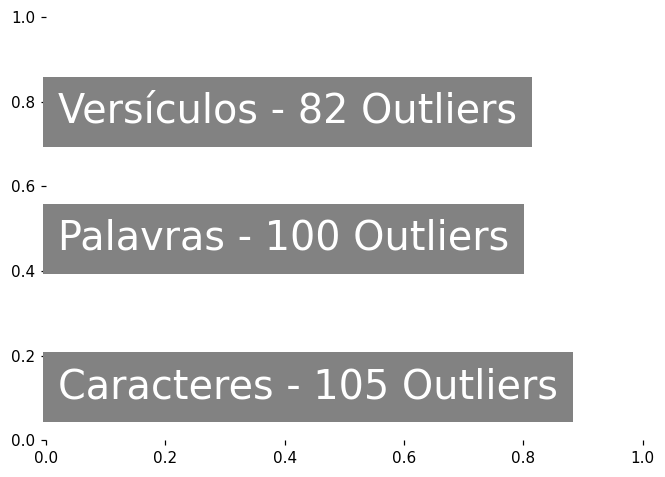

In [ ]:
# Quando você roda o sns.set(style...), as informações são atualizadas e todos os outros gráficos terão o formato. Para limpar a formatação, usamos o código abaixo
sns.reset_orig()
sns.reset_defaults()

fig, ax = plt.subplots(figsize=(7, 5), nrows = 1, ncols= 1, dpi=110)
# figsize - tamanho da figura ((largura, altura) em polegadas) , dpi - resolução da imagem (pontos/polegada), quanto maior mais pesada e mais demora a rodar

# Removendo as bordas do gráfico
## Forma 1:
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Título do gráfico
ax.text(0.02, 0.75,
         'Versículos - '+str(contSV+contIV)+' Outliers',   # texto que queremos
         fontsize=26,     # tamanho do texto
         color='white',   # cor do texto
         # Colocando um retangulo de cor envolta do texto - para dar destaque ao título
         bbox={'facecolor': '#828282', 'pad': 10, 'edgecolor': 'none'})
# Título do gráfico
ax.text(0.02, 0.45,
         'Palavras - '+str(contSP+contIP)+' Outliers',   # texto que queremos
         fontsize=26,     # tamanho do texto
         color='white',   # cor do texto
         # Colocando um retangulo de cor envolta do texto - para dar destaque ao título
         bbox={'facecolor': '#828282', 'pad': 10, 'edgecolor': 'none'})
# Título do gráfico
ax.text(0.02, 0.1,
         'Caracteres - '+str(contSC+contIC)+' Outliers',   # texto que queremos
         fontsize=26,     # tamanho do texto
         color='white',   # cor do texto
         # Colocando um retangulo de cor envolta do texto - para dar destaque ao título
         bbox={'facecolor': '#828282', 'pad': 10, 'edgecolor': 'none'})

## Análise das Variáveis Categóricas:

### Valores únicos na coluna 'Divisão'

In [ ]:
#Ulizado unique - para coletar dados unicos,
print("A Biblia é dividida em {} Partes sendo elas:\n{} ".format(df['Divisão'].nunique(),
                                                               " e ".join(df['Divisão'].unique()[0:])))

A Biblia é dividida em 2 Partes sendo elas:
Velho Testamento e Novo Testamento 


In [ ]:
i=0
anterior = ''
VelhoTestamento =0
NovoTestamento =0

for i in range (len(df['Livro'])):
  if df['Livro'][i] != anterior:
    anterior = df['Livro'][i]
    if df['Divisão'][i] == 'Novo Testamento':
      NovoTestamento += 1
    else:
      VelhoTestamento +=1

print(f'O Velho Testamento tem {VelhoTestamento} Livros, enquanto o Novo Testamento tem {NovoTestamento} Livros.')

O Velho Testamento tem 39 Livros, enquanto o Novo Testamento tem 27 Livros.


In [ ]:
# Analise estatistica do Velho e Novo Testamento
Divisão = df.groupby("Divisão")
Divisão.describe().head()

Versículos                        ... Caracteres                  
                      count       mean        std  ...        50%      75%      max
Divisão                                            ...                             
Novo Testamento       260.0  30.603846  13.746210  ...     3120.5  4228.75   7951.0
Velho Testamento      929.0  24.913886  13.129704  ...     2955.0  4063.00  13070.0

[2 rows x 24 columns]

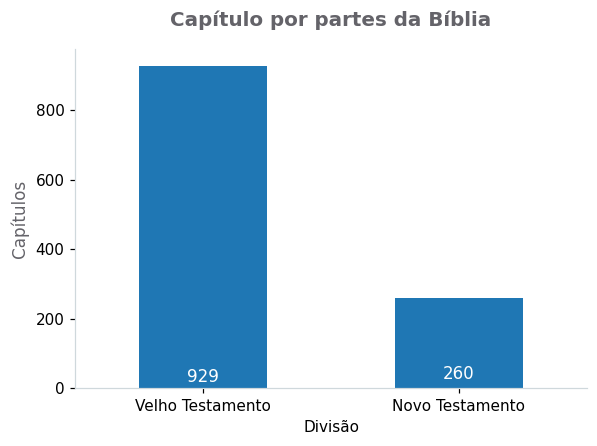

In [ ]:
# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6,4),       # (largura, altura) em polegadas
                       dpi=110)                                   # resolução (pontos/polegada)
# Título geral
ax.set_title('Capítulo por partes da Bíblia', fontsize=13,loc='center',pad=15,weight = 'bold', color = '#646369')

Divisão.size().sort_values(ascending=False).plot.bar()

ax.text(0,31, 929 , fontsize=11, color='white',verticalalignment='center',horizontalalignment='center')
ax.text(1,41, 260 , fontsize=11, color='white',verticalalignment='center',horizontalalignment='center')

#Sumir com linhas laterais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#cfd8dc')
ax.spines['left'].set_color('#cfd8dc')

plt.xticks(rotation=0)
plt.ylabel("Capítulos",color = '#646369',fontsize=11)

plt.show()

###Boxplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


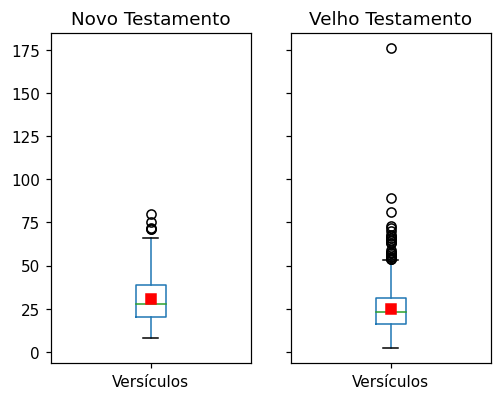

In [ ]:
# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,4),       # (largura, altura) em polegadas
                       dpi=110)                                   # resolução (pontos/polegada)
# Título geral
fig.suptitle('Comparação do N° de Versículos entre os Testamentos', fontsize=13,y=1.09,weight = 'bold', color = '#646369')

#1° Gráfico
Divisão.boxplot(column='Versículos',ax=ax,grid=False,showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red",
                       "markeredgecolor":"red",
                      "markersize":"6"})
ax.axis(ymin=0)
#Sumir com linhas laterais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#cfd8dc')
ax.spines['left'].set_color('#cfd8dc')
# modifica a aparência dos ticks, ticks labels e gridlines
ax.tick_params(axis='both', colors ='#76787B',labelsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


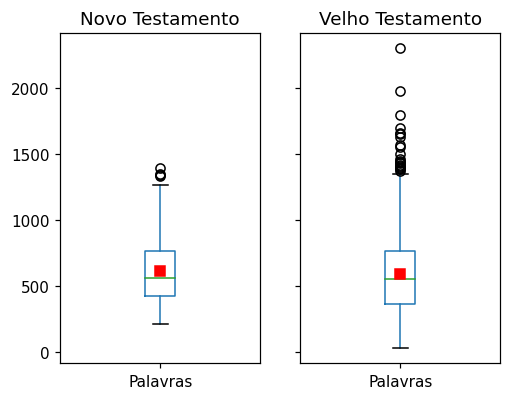

In [ ]:
# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,4),       # (largura, altura) em polegadas
                       dpi=110)                                   # resolução (pontos/polegada)
# Título geral
fig.suptitle('Comparação do N° de Palavras entre os Testamentos', fontsize=13,y=1.17,weight = 'bold', color = '#646369')

#1° Gráfico
Divisão.boxplot(column='Palavras',ax=ax,grid=False,showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red",
                       "markeredgecolor":"red",
                      "markersize":"6"})
ax.axis(ymin=0)
#Sumir com linhas laterais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#cfd8dc')
ax.spines['left'].set_color('#cfd8dc')
# modifica a aparência dos ticks, ticks labels e gridlines
ax.tick_params(axis='both', colors ='#76787B',labelsize=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


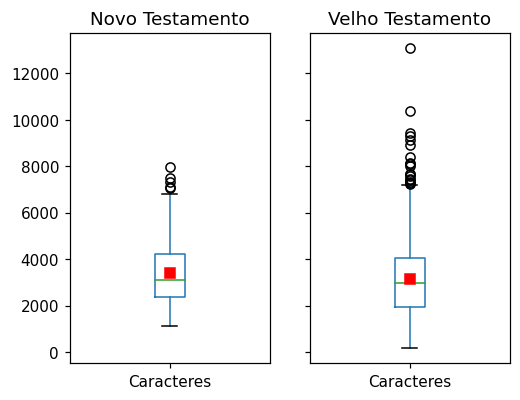

In [ ]:
# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,4),       # (largura, altura) em polegadas
                       dpi=110)                                   # resolução (pontos/polegada)
# Título geral
fig.suptitle('Comparação do N° de Caracteres entre os Testamentos', fontsize=13,y=1.17,weight = 'bold', color = '#646369')

#1° Gráfico
Divisão.boxplot(column='Caracteres',ax=ax,grid=False,showmeans=True,meanprops={"marker":"s",
                       "markerfacecolor":"red",
                       "markeredgecolor":"red",
                      "markersize":"6"})
ax.axis(ymin=0)
#Sumir com linhas laterais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#cfd8dc')
ax.spines['left'].set_color('#cfd8dc')
# modifica a aparência dos ticks, ticks labels e gridlines
ax.tick_params(axis='both', colors ='#76787B',labelsize=10)

plt.show()

### Pairplot

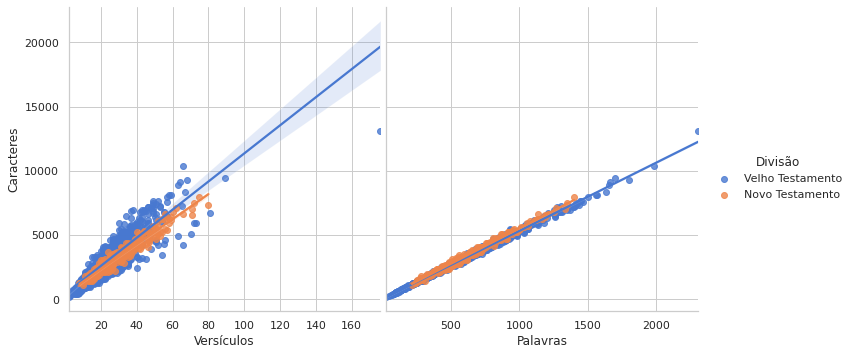

In [ ]:
# O pairplot mostra a relação entre todas as variáveis do nosso conjunto de dados de uma só vez
sns.pairplot(df,  hue = "Divisão",y_vars = "Caracteres", x_vars = ["Versículos","Palavras"],  kind= "reg", height= 5)

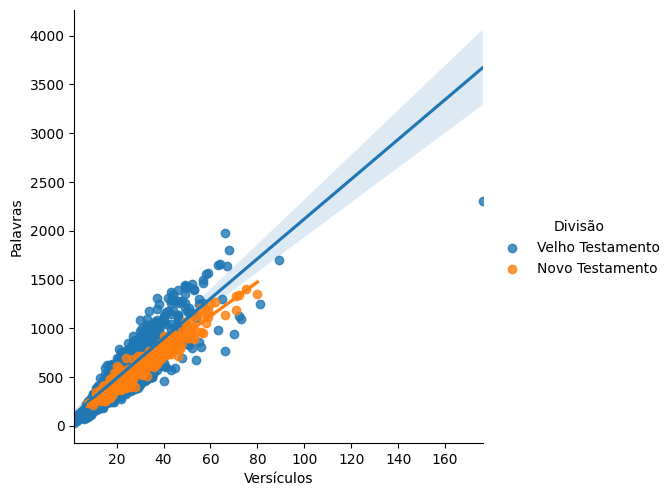

In [ ]:
sns.pairplot(df,  hue = "Divisão",y_vars = "Palavras", x_vars = ["Versículos"],  kind= "reg", height= 5)


### Valores únicos na coluna 'Livro'



In [ ]:
print("A Biblia é dividida em {} Livros sendo elas:\n\n{} ".format(df['Livro'].nunique(),
                                                                df['Livro'].unique()))
#sns.countplot(x='Livro', data=df)

A Biblia é dividida em 66 Livros sendo elas:

['Gênesis' 'Êxodo' 'Levítico' 'Números' 'Deuteronômio' 'Josué' 'Juízes'
 'Rute' '1 Samuel' '2 Samuel' '1 Reis' '2 Reis' '1 Crônicas' '2 Crônicas'
 'Esdras' 'Neemias' 'Ester' 'Jó' 'Salmos' 'Provérbios' 'Eclesiastes'
 'Cânticos' 'Isaías' 'Jeremias' 'Lamentações' 'Ezequiel' 'Daniel' 'Oséias'
 'Joel' 'Amós' 'Obadias' 'Jonas' 'Miquéias' 'Naum' 'Habacuque' 'Sofonias'
 'Ageu' 'Zacarias' 'Malaquias' 'Mateus' 'Marcos' 'Lucas' 'João' 'Atos'
 'Romanos' '1 Coríntios' '2 Coríntios' 'Gálatas' 'Efésios' 'Filipenses'
 'Colossenses' '1 Tessalonicenses' '2 Tessalonicenses' '1 Timóteo'
 '2 Timóteo' 'Tito' 'Filemom' 'Hebreus' 'Tiago' '1 Pedro' '2 Pedro'
 '1 João' '2 João' '3 João' 'Judas' 'Apocalipse'] 


### Nuvem de Palavras

In [ ]:
#Definir Frequência dos Livros
# USEI O ---> import re
aa = df['Livro']
#Substituir espaço por traço
for i in range (len(aa)):
  aa[i] = re.sub(r' ', '-',aa[i])

#Criar um Histograma
word2Count = {}
words = []
word = []
i=0
j=0
#Preencher lista Word
for i in range (len(aa.unique())):
  word.append(aa.unique()[i])
#Preencher Biblioteca
i=0
for i in range (len(aa)):
  words.append(aa[i])
  for j in range (len(aa.unique())):
      if words[i] == word[j]:
        if word [j] not in word2Count.keys():
          word2Count[word [j]]=1
        else:
          word2Count[word [j]] +=1

print(word2Count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


{'Gênesis': 50, 'Êxodo': 40, 'Levítico': 27, 'Números': 36, 'Deuteronômio': 34, 'Josué': 24, 'Juízes': 21, 'Rute': 4, '1-Samuel': 31, '2-Samuel': 24, '1-Reis': 22, '2-Reis': 25, '1-Crônicas': 29, '2-Crônicas': 36, 'Esdras': 10, 'Neemias': 13, 'Ester': 10, 'Jó': 42, 'Salmos': 150, 'Provérbios': 31, 'Eclesiastes': 12, 'Cânticos': 8, 'Isaías': 66, 'Jeremias': 52, 'Lamentações': 5, 'Ezequiel': 48, 'Daniel': 12, 'Oséias': 14, 'Joel': 3, 'Amós': 9, 'Obadias': 1, 'Jonas': 4, 'Miquéias': 7, 'Naum': 3, 'Habacuque': 3, 'Sofonias': 3, 'Ageu': 2, 'Zacarias': 14, 'Malaquias': 4, 'Mateus': 28, 'Marcos': 16, 'Lucas': 24, 'João': 21, 'Atos': 28, 'Romanos': 16, '1-Coríntios': 16, '2-Coríntios': 13, 'Gálatas': 6, 'Efésios': 6, 'Filipenses': 4, 'Colossenses': 4, '1-Tessalonicenses': 5, '2-Tessalonicenses': 3, '1-Timóteo': 6, '2-Timóteo': 4, 'Tito': 3, 'Filemom': 1, 'Hebreus': 13, 'Tiago': 5, '1-Pedro': 5, '2-Pedro': 3, '1-João': 5, '2-João': 1, '3-João': 1, 'Judas': 1, 'Apocalipse': 22}


In [ ]:
#Ordenar itens na lista do maior para o menor
import heapq
freq = heapq.nlargest(len(aa.unique()),word2Count,key=word2Count.get)
print(freq)

['Salmos', 'Isaías', 'Jeremias', 'Gênesis', 'Ezequiel', 'Jó', 'Êxodo', 'Números', '2-Crônicas', 'Deuteronômio', '1-Samuel', 'Provérbios', '1-Crônicas', 'Mateus', 'Atos', 'Levítico', '2-Reis', 'Josué', '2-Samuel', 'Lucas', '1-Reis', 'Apocalipse', 'Juízes', 'João', 'Marcos', 'Romanos', '1-Coríntios', 'Oséias', 'Zacarias', 'Neemias', '2-Coríntios', 'Hebreus', 'Eclesiastes', 'Daniel', 'Esdras', 'Ester', 'Amós', 'Cânticos', 'Miquéias', 'Gálatas', 'Efésios', '1-Timóteo', 'Lamentações', '1-Tessalonicenses', 'Tiago', '1-Pedro', '1-João', 'Rute', 'Jonas', 'Malaquias', 'Filipenses', 'Colossenses', '2-Timóteo', 'Joel', 'Naum', 'Habacuque', 'Sofonias', '2-Tessalonicenses', 'Tito', '2-Pedro', 'Ageu', 'Obadias', 'Filemom', '2-João', '3-João', 'Judas']


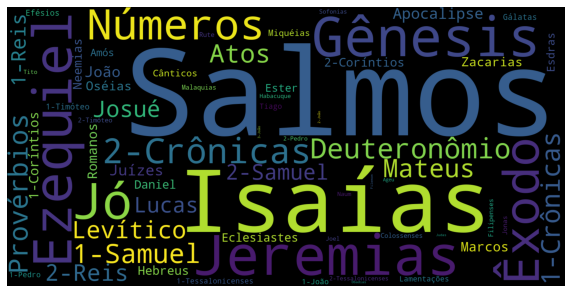

In [ ]:
#NUVEM DE PALAVRAS
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Gerar uma wordcloud
wordcloud = WordCloud(background_color="black", max_words=66,
                      width=1600, height=800).generate_from_frequencies(word2Count)

#mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

### Analise estatistica dos Livros

In [ ]:
Livro = df.groupby("Livro")
Livro.describe().head()

Versículos                        ... Caracteres                  
                 count       mean        std  ...        50%      75%      max
Livro                                         ...                             
1 Coríntios       16.0  27.312500  12.202288  ...     2741.0  3345.00   5912.0
1 Crônicas        29.0  32.482759  15.225966  ...     3480.0  4259.00   6702.0
1 João             5.0  21.000000   6.964194  ...     2362.0  2633.00   3312.0
1 Pedro            5.0  21.000000   4.636809  ...     2826.0  2895.00   3233.0
1 Reis            22.0  37.090909  11.847881  ...     4777.5  6734.75  10367.0

[5 rows x 24 columns]

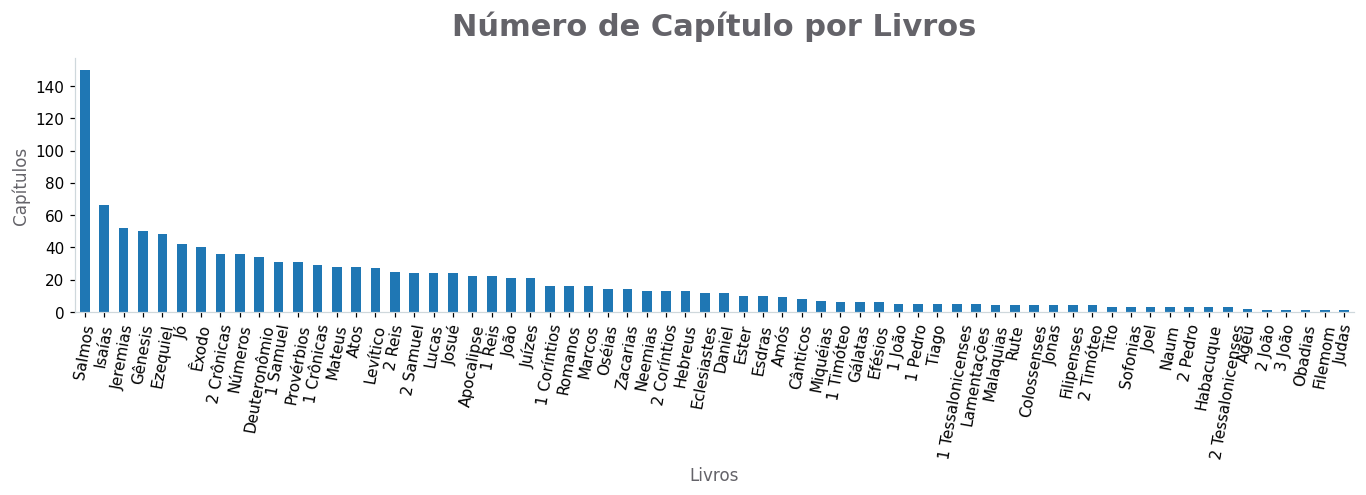

In [ ]:
# 1 - Figure e axis
# Criando a variável fig e a variável ax   (figura, eixos):
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(15,3),       # (largura, altura) em polegadas
                       dpi=110)                                   # resolução (pontos/polegada)
# Título geral
ax.set_title('Número de Capítulo por Livros', fontsize=20,loc='center',pad=15,weight = 'bold', color = '#646369')

Livro.size().sort_values(ascending=False).plot.bar()
#Sumir com linhas laterais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('#cfd8dc')
ax.spines['left'].set_color('#cfd8dc')

plt.xticks(rotation=80)
plt.xlabel("Livros",color = '#646369',fontsize=11)
plt.ylabel("Capítulos",color = '#646369',fontsize=11)

plt.show()